# Using Computers to Analyze Complex Problems and Motion
***

## Physics 1010: Honors Physics
***

1. [Motion](#Motion) <br>
  1.1 [Chaotic Oscillators](#Chaotic_Oscillators) <br>
  1.2 [Lyapunov Exponent](#l_exponent)<br>
2. [Complex Problems](#Fractals) <br>
  2.1 [Feigenbaum Plot](#feigenbaum)<br>
  2.2 [Mandelbrot Set](#mandelbrot)<br>
  2.3 [Julia Set](#julia)<br>
  2.4 [Diffusion Limited Aggregation](#dla)<br>
3. [Optional](#optional) <br>
  3.1 [Phase Space](#phase_space)<br>

<a id="Motion"></a>
## Motion

<a id="Chaotic_Oscillators"></a>
### Chaotic Oscillators

In your physics class you have (hopefully) been introduced to the idea of simple harmonic motion. In this motion the body feels a force proportional to the distance it is placed from equilibrium in the opposite direction.

$$F = -k \theta $$

Using Newton's second law and some simplifying assumptions we have

\begin{align*}
m\vec{a} &= \Sigma \vec{F} \\
  &= -k\theta \\
a &= \ddot{\theta} = - \frac{k}{m}\theta \\
\therefore \theta(t) &= A \sin (\omega t + \phi) \\
\omega &= \sqrt{\frac{k}{m}}
\end{align*}

This motion is nice because it is simple to work with. However, it is also pretty boring. We can add complexity to the problem by adding a damping force proportional to the velocity and a driving force.

In order to find chaotic behavior in a pendulum, we need to remove several of the simplyfying assumptions that are used when we first study simple harmonic motion. First we need to remove the small angle approximation that was used. Without it, we have:

$$ \ddot{\theta } \propto sin(\theta) $$

We will also need to include a dissapative term of the form:

$$ F_{damp} \propto \dot{\theta} $$

Finally, we will also consider a driving force on the oscillator. For these purposes we will simply use a sinusoid, but the driving force could take any form in principle. 

$$ F_{drive} = F_0 sin( \Omega t) $$

Once we put all of this together, Newton's second law becomes

$$ ml \ddot{ \theta } = -bl\dot{\theta} - mg sin( \theta ) + F_0 sin( \Omega t ) $$

$$ \ddot{ \theta } = - \frac{b}{m} \dot{ \theta } - \frac{g}{l} sin( \theta ) + \frac{F_0 }{ml} sin( \Omega t) $$

We can redefine some constants to make this problem more tractable (and because my undergrad classical mechanics book did). 

\begin{align}
2 \beta &\equiv \frac{b}{m} \\
\omega_0^2 &\equiv \frac{g}{l} \\
\gamma & \equiv \frac{F_0}{mg} \\
\therefore \gamma \omega_0^2 &= \frac{F_0}{ml}
\end{align}

Plugging these into our DE yields:

$$ \ddot{ \theta } = -2\beta \dot{\theta} - \omega_0^2 sin( \theta ) = \gamma \omega_0^2 sin( \Omega t) $$

Splitting this into 2 first order DEs we get:

\begin{align}
\dot{\theta} &= \omega \\
\dot{\omega} &= -2\beta \omega - \omega_0^2 sin(\theta) + \gamma \omega_0^2 sin(\Omega t)
\end{align}

<a id="l_exponent"></a>
### Lyapunov Exponent and (Classical) Chaos

One characteristic of chaotic motion is the sensitivity of the motion to initial conditions. One way to quantify this sensitivity uses a Lyapunov exponent. For this, the divergence is proportional to the exponent of the initial separation.

$$ \big| \delta Z(t) \big| \approx e^{\lambda t} \big| \delta Z_0 \big| $$

To model this in python, we will start with two driven, damped harmonic oscillators with slightly different initial conditions. To find the Lyapunov exponent we will use a linear fit on the log of the difference of the angle. 

\begin{align*}
\Delta \omega &\approx e^{\lambda t} \Delta \omega _0 \\
\ln \Delta \omega &\approx \lambda t + \ln \Delta \omega _0
\end{align*}

Once we have $\lambda$ we can classify the motion based on its value
-  $\lambda < 0$: The motion is asymptotically stable.
-  $\lambda = 0$: The motion is stable (and the system is conservative).
-  $\lambda > 0$: The motion is unstable and chaotic.

More information can be found [here](https://hypertextbook.com/chaos/lyapunov-1/) and at a higher level on [wikipedia](https://en.wikipedia.org/wiki/Lyapunov_exponent).

In [1]:
%matplotlib inline

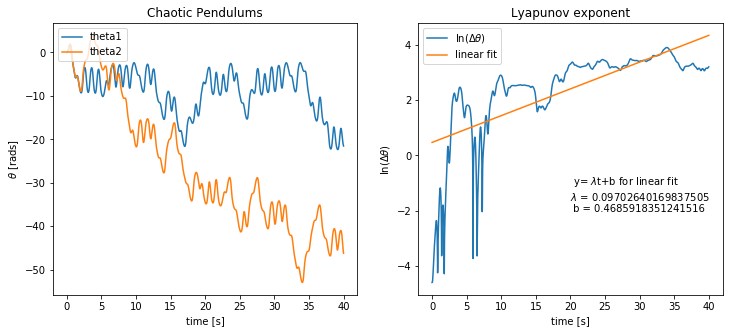

In [66]:
import matplotlib.pylab as plt
import numpy as np
from scipy.integrate import ode

def f1(t, y):
    return[y[1], -2*beta*y[1] -omega_0**2*np.sin(y[0]) + A1*np.sin(Omega*t)]      # [d(theta)/dt, d(omega)/dt]

def f2(t, y):
    return[y[1], -2*beta*y[1] -omega_0**2*np.sin(y[0]) + A2*np.sin(Omega*t)]       # for second pundulum

# define some parameters (similar to classical mechanics book)
Omega = 2*np.pi  # driving frequency
beta = 3/4*np.pi   # b/(2m)
omega_0 = 3*np.pi # natural frequency = sqrt(g/l)  
gamma1 = 1.18 # related to amplitude of driving force = F_0/(mg)
gamma2 = 1.16
A1 = gamma1*omega_0**2 # related to amplitude of driving force = gamma omega_0^2 = F_0/(ml)
A2 = gamma2*omega_0**2

# initial values
omega_init1 = 0.0
theta_init1 = 0.0
omega_init2 = 0.0
theta_init2 = 0.0
t_init = 0

multiplier = 100.
nsteps = int(20*multiplier)
dt = 2/multiplier

# initialize arrays and set initial values
t1 = np.zeros(nsteps)
t2 = np.zeros(nsteps)
omega1 = np.zeros(nsteps)
theta1 = np.zeros(nsteps)
omega2 = np.zeros(nsteps)
theta2 = np.zeros(nsteps)
t1[0] = t_init
omega1[0] = omega_init1
theta1[0] = theta_init1
t2[0] = t_init
omega2[0] = omega_init2
theta2[0] = theta_init2

# set up the integrators
r1 = ode(f1).set_integrator('dopri5')
r1.set_initial_value([theta_init1, omega_init1], t_init)
r2 = ode(f2).set_integrator('dopri5')
r2.set_initial_value([theta_init2, omega_init2], t_init)

# integrate the 1st pendulum
k = 1
while r1.successful() and k < nsteps:
    r1.integrate(r1.t + dt)
    t1[k] = r1.t                      # should be the same values as the second integrator
    theta1[k] = r1.y[0]
    omega1[k] = r1.y[1]
    k = k + 1
    
# integrate the 2nd pendulum
k = 1
while r2.successful() and k < nsteps:
    r2.integrate(r2.t + dt)
    t2[k] = r2.t                      # t values should be the same, but just in case
    theta2[k] = r2.y[0]
    omega2[k] = r2.y[1]
    k = k + 1

# calculate the stuff for the Lyapunov exponent
lndtheta = np.log(np.abs(theta1 - theta2)+0.01)
m, b = np.polyfit(t1,lndtheta,1)
# print(m,b)

fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(1,2,1)
ax.plot(t1, theta1, label = 'theta1')
ax.plot(t2, theta2, label = 'theta2')
ax.legend(loc = 'upper left')
ax.set_xlabel('time [s]')
ax.set_ylabel(r'$\theta $ [rads]')
ax.set_title('Chaotic Pendulums')

ax = fig.add_subplot(1,2,2)
ax.plot(t1,lndtheta, label = r'$\ln (\Delta \theta )$')
ax.plot(t1, m*t1 + b, label = 'linear fit')
ax.set_title('Lyapunov exponent')
ax.legend(loc = 'upper left')
ax.set_xlabel('time [s]')
ax.set_ylabel(r'$\ln (\Delta \theta )$')
ax.text(20,-2, r' y= $\lambda$t+b for linear fit' + '\n' + r'$\lambda$ = '+str(m)+'\n b = '+str(b))
plt.show()

<a id="Fractals"></a>
## Complex Problems

<a id="feigenbaum"></a>
### Feigenbaum Plot

One of the most famous examples of the phenomenon of chaos is the logistic map, defined by the equation

$$x' = rx(1-x).$$

For a given value of the constant $r$ you take a value of $x$-say $x=1/2$-and you feed it into the right-hand side of this equation, which gives you a value of $x'$. Then you take that value and feed it back in on the right-hand side again, which gives you another value, and so forth. this is a iterative map. You keep doing the same operation over and over on your value of $x$, and one of three things happens:

1. The value settles down to a fixed number and stays there. This is called *fixed point*. For instance, $x=0$ is always a fixed point of the logistic map. (You put $x=0$ on the right-hand side and you get $x'=0$ on the left.)

2. It doesn't settle down to a single value, but it settles down into a periodic pattern, rotating around a set of values, such as say four values, repeating them in sequence over and over. This is called a *limit cycle*.

3. It goes crazy. It generates a seemingly random sequence of numbers that appear to have no rhyme or reason to them at all. this is *deterministic chaos*. "Chaos" because it really does look chaotic, and "deterministic" because even though the values look random, they're not. They're clearly entirely predictable, because they are given to you by one simple equation. The behavior is *determined*, although it may not look like it.

For a given value of $r$, start with $x = 1/2$, and iterate the logistic map equation a thousand times. that will give it a chance to settle down to a fixed point or limit cycle if it's going to. Then run for another thousand iterations and plot the points $(r,x)$ on a graph where the horizontal axix is $r$ and the vertical axis is $x$. You can either use the plot fnction with the options "ko" or "k." to draw a graph with dots, one for each point, or you can use the scatter function to draw a scatter plot (which always uses dots). Repeat the whole calculation for values of $r$ from 1 to 4 in steps of 0.01, plotting the dots for all values of $r$ on the same figure and then finally using the function show once to display the complete figure.

The plot generated is the famous picture called the *Feigenbaum plot*, after its discoverer Mitchell Feigenbaum, or sometimes the *figtree plot*, a play on the fact that it looks like a tree and Feigenbaum means "figtree" in German.

Give answers to the following questions:

a) For a given value of $r$ what would a fixed point look like on the Feigenbaum plot? How about a limit cycle? And what would chaos look like?

b) Based on your plot, at what value of $r$ does the system move from orderly behavior (fixed points or limit cycles) to chaotic behavior? This point is sometimes called the "edge of chaos."

The logistic map is a very simple mathematical system, but deterministic chaos is seen in many more complex physical systems also, including expecially fluid dynamics and the weather. Because of its apparently random nature, the behavior of chaotic systems is difficult to predict and strongly affected by small pertubation in outside conditions. You've probably heard of the classic example of chaos in weather systems, the *butterfly effect*, which was popularized by physicist Edward Lorenz in 1972 when he gave a lecture to the American Assiciation for the Advancement of Science entitled, "Does the flap of a butterfly's wings in Brazil set off a tornado in Texas?"

/apps/anaconda/3/current/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """


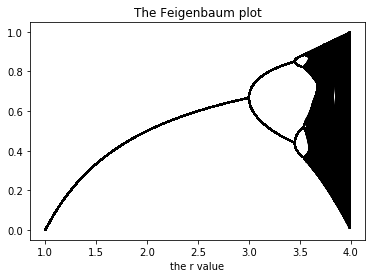

In [67]:
import numpy as np
import matplotlib.pylab as plt

def logistic_map(r,x):
    x = r*x*(1-x)
    return x

r = np.arange(1,4+0.01,0.01) # the r values to use
x = np.empty(len(r))         # empty array for x values
x.fill(0.5)                  # fill the x with the initial value
                    
steps = 1000                  # the number of times to run the logistic map

plt.figure()

for i in range(steps):
    x = logistic_map(r,x)        # let it settle down
for i in range(steps):
    x = logistic_map(r,x)        # plot the behavior
    plt.plot(r,x,"k")

plt.title('The Feigenbaum plot')
plt.xlabel('the r value')
plt.show()

<a id="mandelbrot"></a>
### Mandelbrot Set

The Mandelbrot set, named after its discoverer, the Frence mathematician Benoit Mandelbrot, is a *fractal*, an infinitely ramified mathematical object that contains structure within structure within structure, as deep as we care to look. The definition of the Mandelbrot set is in terms of complex numbers as follows. 

Consider the equation

$$z' = z^2 +c,$$

where $z$ is a complex number and $c$ is a complex constant. For any given balue of $c$ this equation turns an input number $z$ into an output number $z'$ the definition of the Mandelbrot set involves the repeated iteration of this equation: we take an initial starting value of $z$ and feed it into the equation to get a new value $z'$. Then we take that value and feed it in again to get another value, and so forth. The Mandelbrot set is the set of points in the complex plane that satisfies the following defintion:

*For a given complex value of $c$, start with $z=0$ and iterate repeatedly. If the magnitude of $|z|$ of the resulting value is ever greater than 2, then the point in the complex plane at position $c$ is* not *in the Mandelbrot set, otherwise it is in the set.*

In order to use this definition on would, in principle, have to iterate infinitely many times to prove that a point is in the Mandelbrot set, since a point is in the set only if the iteration never passes $|Z|=2$ ever. In practice, however, one usually just performs some large number of iterations, say 100, and if $|Z|$ hasn't exceeded 2 by that point then we call that good enough.

This program makes an image of the Mandelbrot set by performing the iteration for all value of $c = x + iy$ on an $N \times N$ grid spanning the regions where $ -2 \le x \le 2 $ and $-2 \le y \le 2 $. Make a density plot in which grid points inside the Mandelbrot set are colored black and those outside are colored white. The Mandelbrot set has a very distinctive shape that looks something like a beetle with a long snout-you'll know it when you see it.

You will probably find it useful to start off with quite a coarse grid, i.e, with a small value of $N$ - perhaps $N=100$ - so that your program runs quickly while you are testing it. Once you are sure it is working correctly, increast eh value of $N$ to produce a final high - quality image of the shape of the set.

If you are feeling enthusiastic, here is another variant of the same exercise that can produce amazing looking pictures. Instead of coloring points just black or white, color points according to the number of iterations of the equation before $|z|$ becomes greater than 2 (or the maximum number of iterations if $|z|$ never becomes greater than 2). If you use one of the more colorful color schemes Python provides for density plots, such as the "hot" or "jet" schemes, you can make some spectacular images this way. Another interesting variant is to color accorgint to the logarithm of the number of iterations, which helps reveal some of the finer structure outside the set.

<Figure size 432x288 with 0 Axes>

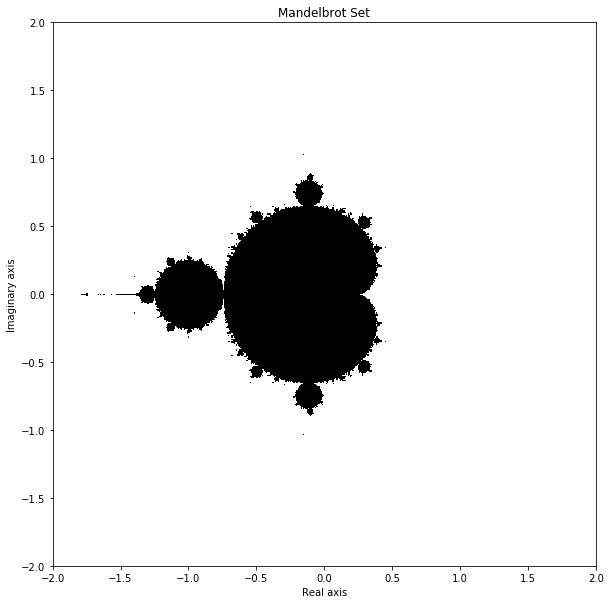

In [78]:
# black and white
import numpy as np
import matplotlib.pylab as plt
    
def Mandelbrot(c):
    z = 0 + 0j
    for i in range(100):
        z = z**2 + c
        if abs(z) > 2:
            break
    if abs(z) >= 2:
        return False           # this c value does not lie in the madelbrot set
    else:
        return True           # this c value does lie in the mandelbrot set

steps = 500
counter = 0 # just for the print('working...') statement
fig = plt.figure()

# first initialize the array for storing the values
mand = np.zeros((n_steps,n_steps), dtype=np.float64)
real_axis = np.arange(-2,2+step_size,step_size)
imag_axis = np.arange(-2,2+step_size,step_size)

for r in range(n_steps):
    c_real = real_axis[r]
    for i in range(n_steps):
        c_imag = imag_axis[i]
        c = complex(c_real,c_imag)
        out = Mandelbrot(c)
        mand[i,r] = out
        
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title('Mandelbrot Set')
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.imshow(mand, extent=[-2,2,-2,2], cmap='Greys')
plt.show()
fig.savefig('images/Mandelbrot_HQ.png')

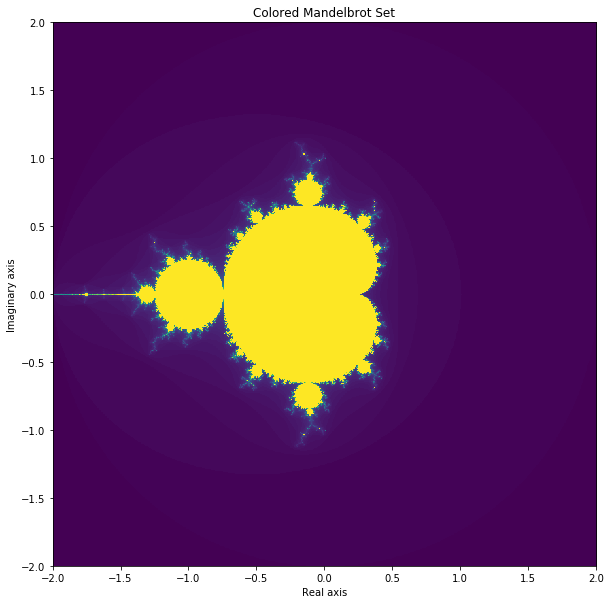

In [79]:
# Colored Set

import numpy as np
import matplotlib.pylab as plt
    
def Mandelbrot(c, n=100):
    z = 0 + 0j
    for i in range(n):
        z = z**2 + c
        if abs(z) > 2:
            n = i           # return the number of steps taken to get out of the Mandelbrot set
            break
    return n                # if in the Mandelbrot set, return 100

n_steps = 800
step_size = 4./n_steps

# first initialize the array for storing the values
mand = np.zeros((n_steps,n_steps), dtype=np.float64)
real_axis = np.arange(-2,2+step_size,step_size)
imag_axis = np.arange(-2,2+step_size,step_size)

for r in range(n_steps):
    c_real = real_axis[r]
    for i in range(n_steps):
        c_imag = imag_axis[i]
        c = complex(c_real,c_imag)
        out = Mandelbrot(c)
        mand[i,r] = out
        
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title('Colored Mandelbrot Set')
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.imshow(mand, extent = [-2,2,-2,2])
plt.show()
fig.savefig('images/Mandelbrot_color.png')

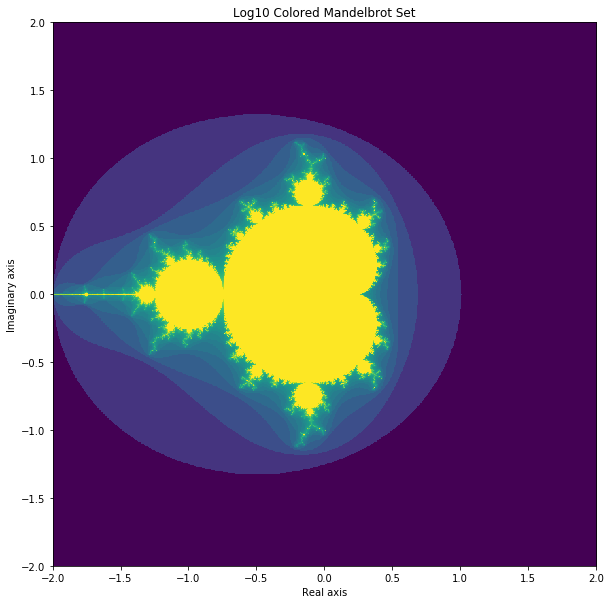

In [80]:
# color according to log_{10} of the iteration number

import numpy as np
import matplotlib.pylab as plt

def Mandelbrot(c, n=100):
    z = 0 + 0j
    for i in range(n):
        z = z**2 + c
        if abs(z) > 2:
            n = i           # return the number of steps taken to get out of the Mandelbrot set
            break
    return n                # if in the Mandelbrot set, return 100

n_steps = 800
step_size = 4./n_steps

# first initialize the array for storing the values
mand = np.zeros((n_steps,n_steps))
real_axis = np.arange(-2,2+step_size,step_size)
imag_axis = np.arange(-2,2+step_size,step_size)

for r in range(n_steps):
    c_real = real_axis[r]
    for i in range(n_steps):
        c_imag = imag_axis[i]
        c = complex(c_real,c_imag)
        out = Mandelbrot(c)
        if out > 0:                # special care since log(0) is undefined
            out = np.log10(out)
        mand[i,r] = out

        
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Log10 Colored Mandelbrot Set')
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.imshow(mand, extent = [-2,2,-2,2])
plt.show()
fig.savefig('images/Mandelbrot_color_log.png')

<a id="julia"></a>
### Julia Set

Another popular extension of the Mandelbrot set is the Julia set. Both sets use the same formula $z'=z^2+c$. However, the starting points are different. That is, $c$ is a constant, and $z_0$ is the starting point (remember that in the Mandelbrot set $z_0 = 0 + 0i$.) Since they use the same function, there is a connection between the images produced from both sets. There is a Julia set for each point in the Mandelbrot set, in some ways you can think of the Mandelbrot set as an index of Julia sets.

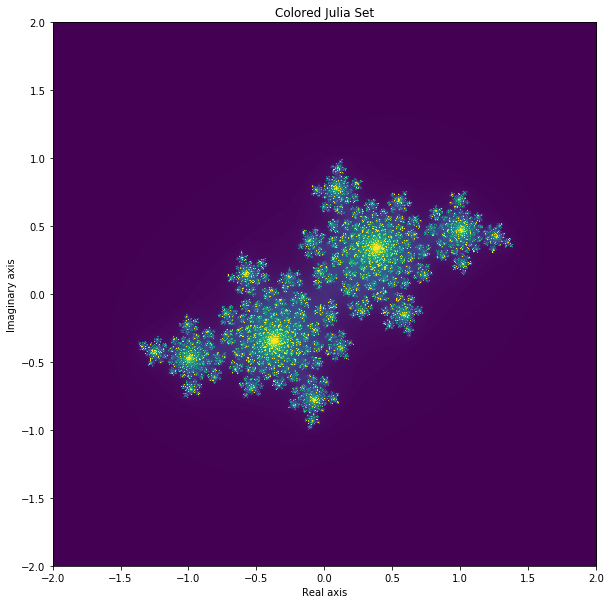

In [81]:
# Colored Julia Set

import numpy as np
import matplotlib.pylab as plt
    
def JuliaSet(c, z_0, n=200):
    z = z_0
    for i in range(n):
        z = z**2 + c
        if abs(z) > 2:
            n = i           # return the number of steps taken to get out of the Julia set
            break
    return n                # if in the Julia set

n_steps = 800
step_size = 4./n_steps

# first initialize the array for storing the values
mand = np.zeros((n_steps,n_steps), dtype=np.float64)
real_axis = np.arange(-2,2+step_size,step_size)
imag_axis = np.arange(-2,2+step_size,step_size)

c = complex(-0.4, 0.6)
for r in range(n_steps):
    z_real = real_axis[r]
    for i in range(n_steps):
        z_imag = imag_axis[i]
        z = complex(z_real,z_imag)
        out = JuliaSet(c, z)
        mand[i,r] = out
        
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title('Colored Julia Set')
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.imshow(mand, extent = [-2,2,-2,2])
plt.show()
fig.savefig('images/JuliaSet_color.png')

<a id="dla"></a>
### Diffusion Limited Aggregation

Diffusion Limited Aggregation is the process where particles undergo a random walk and cluster together once they hit a "seed". This can be used to model many biological processes, such as coral growth, or chemical/phisical processes, such as ion deposition or crystal growth.

dimensionality =  1.458


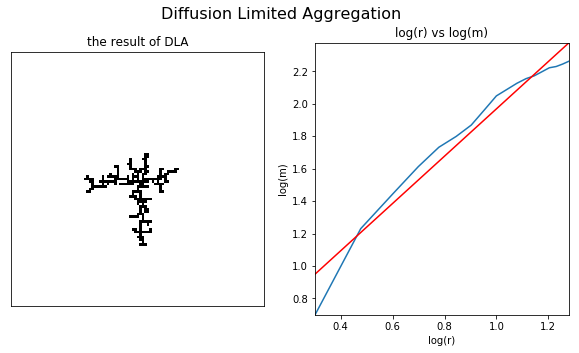

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def initialize(ngrid, center):
    c = np.zeros([ngrid,ngrid],dtype = 'int')
    c[center,center] = 1
    return c

def ctest(x,y,c):
    if c[x,y] == 1:
        return True
    if c[x-1,y] == 1 or c[x+1,y] == 1 or c[x,y-1] == 1 or c[x,y+1] == 1:
        return True
    
def cluster_size(c):
    x,y = np.nonzero(c)
    r = np.sqrt((x-center)**2 + (y-center)**2)
    return max(r)

def walk(x,y):
    rand_val = np.random.random_sample()
    if rand_val < 0.25:
        x += 1
    elif rand_val < 0.5:
        x -= 1
    elif rand_val < 0.75:
        y += 1
    else:
        y -= 1
    return x,y

ngrid = 101            # the size of the grid used for the random walk
center = int(ngrid/2)  # the center of the grid, used for starting new walkers
ntry = 500             # the number of walkers
plt.lim = 100

c = initialize(ngrid,center)

for i in range(ntry):
    rstart = int(cluster_size(c) + 3)
    theta = np.random.random_sample()*2*np.pi # random angle to start the walker
    x = int(center + rstart*np.cos(theta))
    y = int(center + rstart*np.sin(theta))
    go = True
    while go == True:
        # random step
        x,y = walk(x,y)
        test = ctest(x,y,c)  # check if adjascent cell is occupied 
        if test == True:     # if so it sticks,
            c[x,y] = 1
            go = False       # start another walker
        r = np.sqrt((x-center)**2 + (y-center)**2) # check if walker went too far
        if r > 1.5*rstart:   # if walker gets too far, start another walker
            go = False

# now calculate the dimensionality
ry, rx = np.mgrid[0:ngrid,0:ngrid]

rx = rx - center
ry = ry - center

r = np.sqrt(rx**2 + ry**2) # cells corresponding to radius
rc = r*c                   # the radius of occupied cells
rad = np.arange(2,int(rstart*0.7))
m_r = []
for i in range(2,int(rstart*0.7)):
    a = rc[rc<i]
    m_r.append(len(a[a>0])) # the 'mass' as a function of radius

logr = np.log10(rad)
logm = np.log10(m_r)
m,b = np.polyfit(logr,logm,1)
xfit = np.linspace(min(logr),max(logr),100)
yfit = m*xfit + b
print('dimensionality = ', round(m,3))
plt.show()

fig = plt.figure(figsize = (10,5))
plt.suptitle('Diffusion Limited Aggregation', size = 16)

ax1 = fig.add_subplot(121)
ax1.imshow(c, cmap="Greys")
ax1.set_title('the result of DLA')
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_subplot(122)
ax2.plot(logr,logm, label = 'data')
ax2.plot(xfit,yfit, 'r-', label = 'fit')
ax2.set_title('log(r) vs log(m)')
ax2.set_xlabel('log(r)')
ax2.set_ylabel('log(m)')
ax2.set_xlim(min([min(logr),min(xfit)]),max([max(logr),max(xfit)]))
ax2.set_ylim(min([min(logm),min(yfit)]),max([max(logm),max(yfit)]))

plt.show()

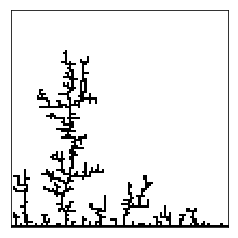

In [60]:
# with a different initial "seed"
import numpy as np
import matplotlib.pyplot as plt

def initialize(ngrid):
    # initialize 
    c = np.zeros([ngrid,ngrid],dtype = 'int')
    c[:,0] = 1
    return c

def ctest(x,y,c):
    # test if the neighbors are occupied
    if c[x,y] == 1:
        return True
    if c[x-1,y] == 1 or c[x+1,y] == 1 or c[x,y-1] == 1 or c[x,y+1] == 1:
        return True
    
def cluster_size(c):
    # get the size of the cluster
    x,y = np.nonzero(c)
    return max(y)

def boundary(x):
    # periodic boundary conditions on x
    if x < 1:
        x = x + ngrid
    if x > ngrid - 2:
        x = x - ngrid + 1
    return x

def reflect(y):
    # reflect y at the top boundary
    if y > ngrid - 2:
        y = y - 2
    return y

def walk(x,y):
    rand_val = np.random.random_sample()
    if rand_val < 0.25:
        x += 1
    elif rand_val < 0.5:
        x -= 1
    elif rand_val < 0.75:
        y += 1
    else:
        y -= 1
    x = boundary(x)
    y = reflect(y)
    return x,y

ngrid = 101
ntry = 700
plt.lim = 100

c = initialize(ngrid)

for i in range(ntry):
    x = np.random.randint(int(0.1*ngrid), int(0.9*ngrid))
    y = int(cluster_size(c)+3)
    go = True
    while go == True:
        # random step
        x,y = walk(x,y)
        test = ctest(x,y,c)  # check if adjacent cell is occupied 
        if test == True:     # if so it sticks,
            c[x,y] = 1
            go = False       # start another walker

c = np.transpose(c)    # the x and y were flipped from what I thought they were.
plt.figure()
plt.imshow(c, origin = 'lower', cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.show()


<a id="optional"></a>
## Optional Parts

<a id="phase_space"></a>
### Phase Space

It is often benefical to characterize motion in terms of the position and momentum. If we combine these into a single space, we get phase space. We can then trace the motion a particle takes through phase space and discover interesting things about the motion. This can be seen in the image below from [wikipedia](https://en.wikipedia.org/wiki/Phase_space).

![wiki](images/wiki_phase_space.PNG "Phase_Space")

As before, the phase space diagram becomes much richer (and more complicated) when you use a driven damped oscillator. To help visualize this motion, we can keep the phase space points of the oscillator when it is in phase with the driving force. 

......................................................................................................................................................finished
elapsed time is  115.54524421691895
number of points found =  1591


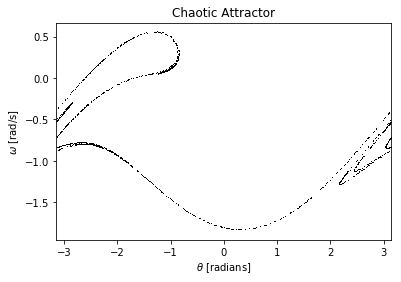

In [75]:
import time
import matplotlib.pylab as plt
import numpy as np
from scipy.integrate import ode

def f(t, y):                           # y[theta, omega]
    return[y[1], -g/l*np.sin(y[0]) - q*y[1] + F_D*np.sin(omega_drive*t)]      # [d(theta)/dt, d(omega)/dt]

# define some parameters like Giordano book
g = 9.8
l = 9.8
omega_drive = 2./3.
dt = 0.005
q = 0.5
F_D = 1.2

# initial values
omega_init = 0.0
theta_init = 0.2
t_init = 0

nsteps = int(3e6)

omega = []   # empty list2
theta = []   

# set up the integrators
r = ode(f).set_integrator('dopri5')
r.set_initial_value([theta_init, omega_init], t_init)

# integrate the pendulum
start = time.time()
twopi = 2*np.pi
k = 0
n = 1
while r.successful() and k < nsteps:
    r.integrate(r.t + dt)
    t_val = r.t                      
    theta_val = r.y[0]
    omega_val = r.y[1]
    # only keep the points that are (almost) in phase with the driving force
    if np.abs(t_val - 2*n*np.pi/omega_drive) < dt/2:   # extra factor of 2 from Giordano book
        omega.append(omega_val)
        theta.append(theta_val%twopi)
        n = n + 1
    k = k + 1
    # show that it is doing something
    if k%2e4<0.01:
        print('.', end = '', flush=True)
        
print('finished')
stop = time.time()
print('elapsed time is ', stop - start)
# change the domain from (0, 2pi) to (-pi, pi)
for i in range(len(theta)):
    if theta[i] > np.pi:
        theta[i] = theta[i] - 2*np.pi

print('number of points found = ',len(omega))
plt.figure()
plt.title('Chaotic Attractor')
plt.plot(theta,omega,'k,')
plt.xlabel(r'$\theta $ [radians]')
plt.xlim(-np.pi,np.pi)
plt.ylabel(r'$\omega $ [rad/s]')
plt.show()

As we can see, this takes quite a bit of time to run. I previously ran this code for $3 \times 10^7$ points and saved the output to a text file. We can read it in and plot the results below. While not a fractal, there is additional structure contained in the shapes.

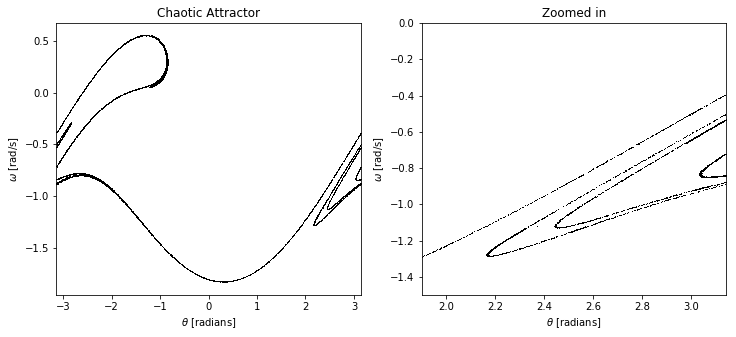

In [76]:
import numpy as np

theta, omega = np.loadtxt('data/theta_v_omega.txt', unpack = True)

fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(1,2,1)
ax.set_title('Chaotic Attractor')
ax.set_xlabel(r'$\theta $ [radians]')
ax.set_ylabel(r'$\omega $ [rad/s]')
ax.set_xlim(-np.pi,np.pi)
ax.plot(theta,omega, 'k,')

ax = fig.add_subplot(1,2,2)
ax.set_title('Zoomed in')
ax.set_xlabel(r'$\theta $ [radians]')
ax.set_ylabel(r'$\omega $ [rad/s]')
ax.set_xlim(1.9,np.pi)
ax.set_ylim(-1.5,0)
ax.plot(theta,omega, 'k,')
plt.show()